In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from babel.numbers import format_currency
from datetime import datetime

In [2]:
#load the dataset
movieRatings = pd.read_csv("/Users/tazallitasnim/Downloads/tv_shows.csv")
movieRatings.head(5)

#dropping the unnamed column
movieRatings = movieRatings.drop(['Unnamed: 0'],axis=1)

In [3]:
#Deatils
movieRatings.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.0
mean,2814.945790,2012.628726,0.367176,0.301975,0.341095,0.065387,1.0
std,1672.385727,10.142813,0.482080,0.459157,0.474122,0.247231,0.0
min,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1345.750000,2011.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2788.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4308.250000,2018.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,5717.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [4]:
#Cleaning Dataset
movieRatings.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5363    False
5364    False
5365    False
5366    False
5367    False
Length: 5368, dtype: bool

In [5]:
#check null
movieRatings.isnull()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5363,False,False,False,True,True,False,False,False,False,False,False
5364,False,False,False,True,True,False,False,False,False,False,False
5365,False,False,False,True,True,False,False,False,False,False,False
5366,False,False,False,True,True,False,False,False,False,False,False


In [6]:
movieRatings.dropna(axis=0, how='any',).shape

(3207, 11)

In [7]:
#drop the null
movieRatings.dropna(axis=0, how='any', inplace=True)

In [8]:
movieRatings.isnull()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5336,False,False,False,False,False,False,False,False,False,False,False
5339,False,False,False,False,False,False,False,False,False,False,False
5340,False,False,False,False,False,False,False,False,False,False,False
5341,False,False,False,False,False,False,False,False,False,False,False


In [9]:
movieRatings.dtypes

ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

In [10]:
#Renaming the column
movieRatings.rename(columns = {"Rotten Tomatoes": "RottenTomatoes"}, inplace=True)

In [11]:
movieRatings.head()

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [12]:
##stripping the % sign and converting to int
movieRatings["RottenTomatoes"]=movieRatings.RottenTomatoes.apply(lambda x: x.replace("/100", " ")).astype("int64")

In [13]:
movieRatings.head()

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93,1,0,0,0,1


## Q1: Top 10 Movies By Rotten Tomatoes

In [14]:
TopTenRT = movieRatings.sort_values(by = "RottenTomatoes", ascending=False).head(10)
TopTenRT

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100,1,0,0,0,1
1950,1960,Rick and Morty,2013,18+,9.2/10,100,0,1,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95,1,1,0,0,1
5057,5376,Loki,2021,16+,8.5/10,95,0,0,0,1,1
5058,5377,The Mandalorian,2019,16+,8.8/10,94,0,0,0,1,1
3,4,Better Call Saul,2015,18+,8.8/10,94,1,0,0,0,1
3446,3581,The Boys,2019,18+,8.7/10,93,0,0,1,0,1
1951,1962,Seinfeld,1989,16+,8.8/10,93,0,1,0,0,1
6,7,Peaky Blinders,2013,18+,8.8/10,93,1,0,0,0,1


In [17]:
movieRatings[movieRatings.Netflix == 1].count()

ID                1329
Title             1329
Year              1329
Age               1329
IMDb              1329
RottenTomatoes    1329
Netflix           1329
Hulu              1329
Prime Video       1329
Disney+           1329
Type              1329
dtype: int64

## Question 2: Top 10 Rated Movies on IMDb?

In [23]:
#stripping the /10 and converting to float
movieRatings["IMDb"]=movieRatings.IMDb.apply(lambda x: x.replace("/10", " ")).astype("float64")

In [24]:
TopTenIMDb = movieRatings.sort_values(by = "IMDb", ascending=False).head(10)
TopTenIMDb

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
5077,5401,Bluey,2018,all,9.6,71,0,0,0,1,1
3802,4054,The Secret World of Nature: Spain,2020,7+,9.6,51,0,0,1,0,1
3611,3818,Malgudi Days,1987,all,9.5,62,0,0,1,0,1
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
2009,2034,Cosmos,2014,all,9.3,82,0,1,1,1,1
80,81,Our Planet,2019,all,9.3,82,1,0,0,0,1
5,6,Avatar: The Last Airbender,2005,7+,9.3,93,1,0,1,0,1
3503,3668,Clarkson's Farm,2021,7+,9.2,76,0,0,1,0,1
1950,1960,Rick and Morty,2013,18+,9.2,100,0,1,0,0,1
5106,5435,Cosmos: Possible Worlds,2020,7+,9.2,62,0,0,0,1,1


## How many movies are from 2010 and imdb >=5?

In [27]:
movieRatings[(movieRatings["IMDb"] >= 5) & (movieRatings["Year"] == 2010)].count()

ID                98
Title             98
Year              98
Age               98
IMDb              98
RottenTomatoes    98
Netflix           98
Hulu              98
Prime Video       98
Disney+           98
Type              98
dtype: int64

## Question 3: How many movies have 18+ Ratings?

In [28]:
movieRatings[movieRatings["Age"] == "18+"].count()

ID                852
Title             852
Year              852
Age               852
IMDb              852
RottenTomatoes    852
Netflix           852
Hulu              852
Prime Video       852
Disney+           852
Type              852
dtype: int64

## Biggest number of movies and tv shows

In [31]:
#Creating different dataframes for each platform
Hulu_df = movieRatings.loc[(movieRatings['Hulu'] > 0) ]
Disney_df = movieRatings.loc[(movieRatings['Disney+'] > 0) ]
PrimeVideo_df = movieRatings.loc[(movieRatings['Prime Video'] > 0)  ]
Netflix_df = movieRatings.loc[(movieRatings['Netflix'] > 0)  ]

<AxesSubplot:title={'center':'Available Movies and TV Shows'}>

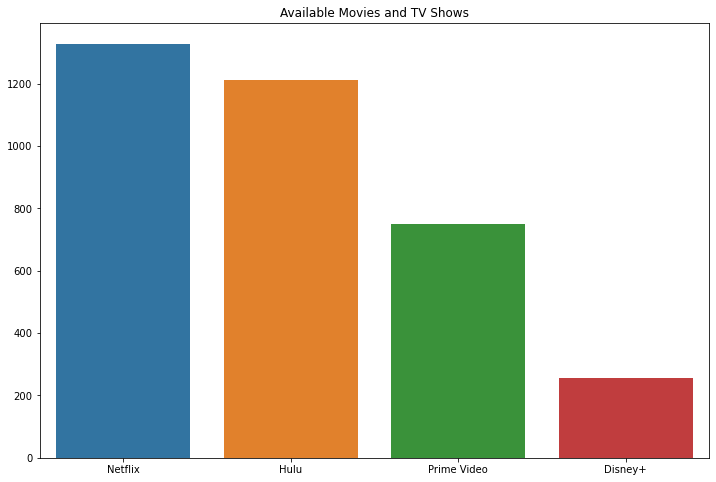

In [36]:
#Selecting the specific columns from the Dataset and saving into a new dataframe
selected_columns = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platforms_df = movieRatings[selected_columns]

#Counting all values for each platform
platforms = platforms_df.sum()
platforms

#Plotting into a bar plot using Seaborn

plt.figure(figsize=(12,8))
plt.title('Available Movies and TV Shows')

sns.barplot(x=platforms.index, y=platforms.values)


## More recent movies and tv shows

In [39]:
#filtering recent contents
recent_movies = movieRatings[(movieRatings["Year"] >= 2010)]

#calculating the totals for each column
total = recent_movies[selected_columns].sum()
total

Netflix        1203
Hulu            785
Prime Video     446
Disney+         181
dtype: int64

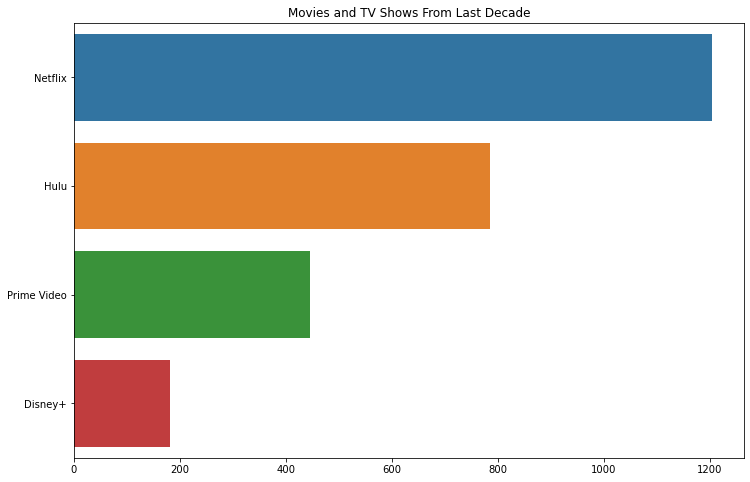

In [42]:
#ploting into a barplot using seaborn
plt.figure(figsize=(12,8))
plt.title('Movies and TV Shows From Last Decade')
sns.barplot(x=total.values, y=total.index)
plt.show()

## Who is the platform with the most highly rated shows?


In [50]:
#Who is the platform with the most highly rated shows?
top_netflix_shows = Netflix_df['IMDb'] > 8
top_hulu_shows = Hulu_df['IMDb'] > 8 
top_prime_shows = PrimeVideo_df['IMDb'] > 8
top_disney_shows = Disney_df['IMDb'] > 8

#Creating a new da
top_rated_shows = pd.DataFrame({
    'Platforms' : ['Netflix', 
                   'Hulu', 
                   'Prime Video', 
                   'Disney'],
    'Total highly rated shows' : [top_netflix_shows.sum(),
                                  top_hulu_shows.sum(),
                                  top_prime_shows.sum(),
                                  top_disney_shows.sum()]})

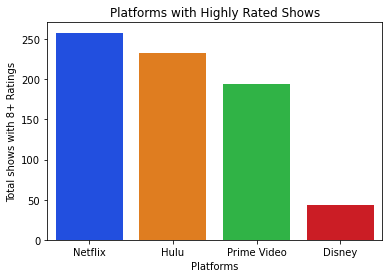

,Total highly rated shows
Platforms,
Netflix,258
Hulu,233
Prime Video,194
Disney,43


In [51]:
sns.barplot(x = top_rated_shows['Platforms'],
            y = top_rated_shows['Total highly rated shows'],
            data = top_rated_shows,
           palette = 'bright')

plt.xlabel('Platforms')
plt.ylabel('Total shows with 8+ Ratings')
plt.title('Platforms with Highly Rated Shows')
plt.show()

top_rated_shows = top_rated_shows.set_index('Platforms')
display(top_rated_shows)

## Best tv-shows on offer for each streaming platform according to IMDb


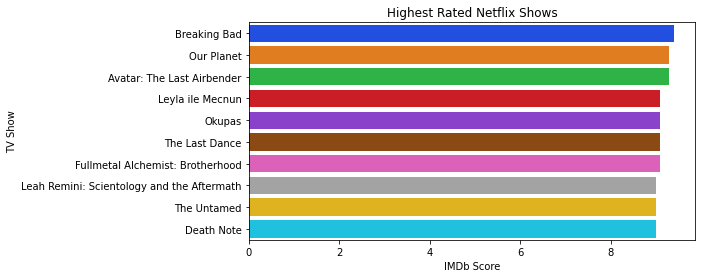

In [55]:
#NETFLIX
netflix_top_10 = Netflix_df.sort_values(by='IMDb', ascending = False).head(10)

netflix_top_10

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=netflix_top_10, palette='bright')
plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Netflix Shows')

plt.show()

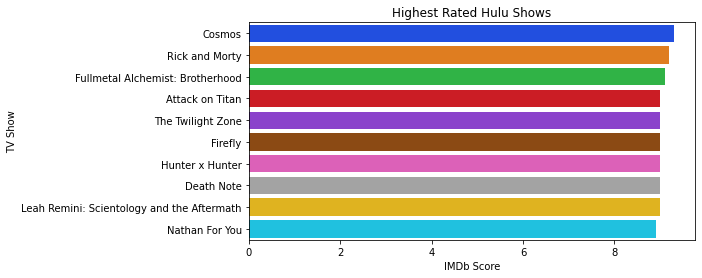

In [58]:
#HULU
hulu_top_10 = Hulu_df.sort_values(by ='IMDb', ascending = False).head(10)
hulu_top_10

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=hulu_top_10, palette='bright')
plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title("Highest Rated Hulu Shows")
plt.show()

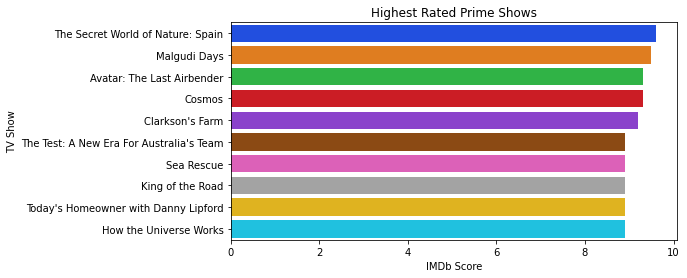

In [59]:
#Prime
prime_top_10 = PrimeVideo_df.sort_values(by ='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=prime_top_10, palette='bright')
plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title("Highest Rated Prime Shows")
plt.show()

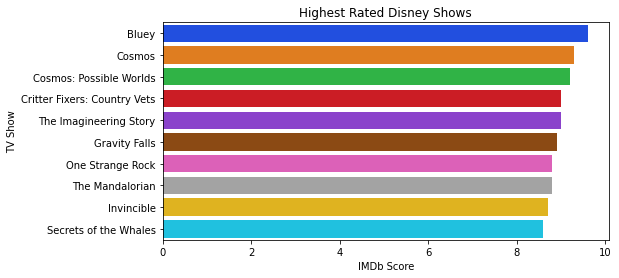

In [60]:
#Disney
disney_top_10 = Disney_df.sort_values(by ='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=disney_top_10, palette='bright')
plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title("Highest Rated Disney Shows")
plt.show()

## Who owns the current highest rated tv-shows across the 4 streaming platforms?


<Figure size 576x576 with 0 Axes>

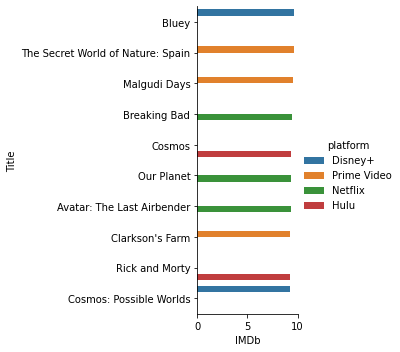

In [61]:
movieRatings['platform'] = movieRatings[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(axis=1)

overall_top_10 = movieRatings.sort_values(by='IMDb', ascending=False).head(10)

plt.figure(figsize=(8,8))
sns.catplot(x='IMDb', y='Title', data=overall_top_10,hue='platform', kind='bar')
plt.show()

## Which services are best suited for children?

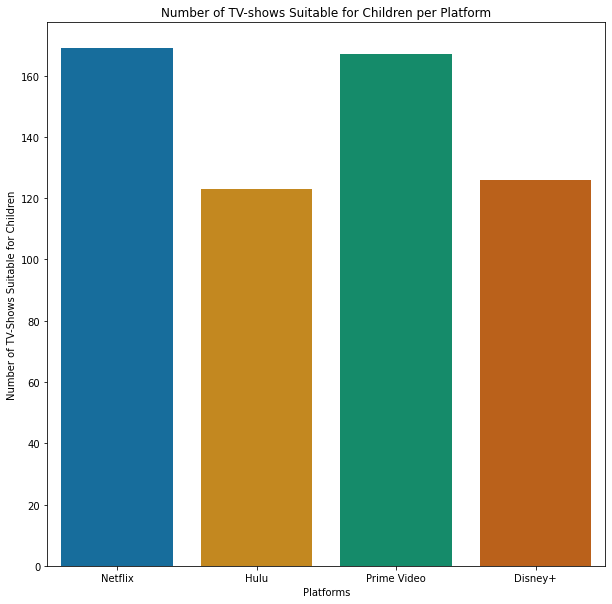

Netflix has 169 tv-shows for children
Hulu has 123 tv-shows for children
Prime has 167 tv-shows for children
Disney+ has 126 tv-shows for children


In [64]:
#'all' signifies they are suitable for children, which platforms are best subscribed to for children entertainment?

net_child = Netflix_df[Netflix_df['Age'] == 'all']
hulu_child = Hulu_df[Hulu_df['Age'] == 'all']
prime_child = PrimeVideo_df[PrimeVideo_df['Age'] == 'all']
disney_child = Disney_df[Disney_df['Age'] == 'all']

net1 = len(net_child['Title'])
hulu1 = len(hulu_child['Title'])
prime1 = len(prime_child['Title'])
disney1 = len(disney_child['Title'])

children_sum = ({
    'platforms' : ['Netflix',
                   'Hulu',
                   'Prime Video',
                  'Disney+'],
    'sums' : [net1,
               hulu1,
               prime1,
               disney1]
})
plt.figure(figsize=(10,10))
sns.barplot(x = children_sum['platforms'],
           y = children_sum['sums'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Number of TV-Shows Suitable for Children')
plt.title('Number of TV-shows Suitable for Children per Platform')

plt.show()

print('Netflix has ' + str(net1) + ' tv-shows for children')
print('Hulu has ' + str(hulu1) + ' tv-shows for children')
print('Prime has ' + str(prime1) + ' tv-shows for children')
print('Disney+ has ' + str(disney1) + ' tv-shows for children')